# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.style.use('ggplot')

# Reading-in Files and Totals

In [2]:
oct_all = pd.read_csv('../data/tbl_prod_GABU202010_all.csv', sep= '|')
nov_all = pd.read_csv('../data/tbl_prod_GABU202011_all.csv', sep= '|')
dec_all = pd.read_csv('../data/tbl_prod_GABU202012_all.csv', sep= '|')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (4,9,10,11,18,19,20,21,29,39) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (4,9,10,11,39) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
oct_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7635246 entries, 0 to 7635245
Data columns (total 45 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   county_code                 int64  
 1   registration_number         int64  
 2   voter_status                object 
 3   residence_city              object 
 4   residence_zipcode           object 
 5   birthyear                   int64  
 6   registration_date           object 
 7   race                        object 
 8   gender                      object 
 9   land_district               object 
 10  land_lot                    object 
 11  status_reason               object 
 12  county_precinct_id          object 
 13  city_precinct_id            object 
 14  congressional_district      int64  
 15  senate_district             int64  
 16  house_district              int64  
 17  judicial_district           object 
 18  commission_district         object 
 19  school_district      

In [4]:
oct_state_tot = oct_all['registration_number'].count()
nov_state_tot = nov_all['registration_number'].count()
dec_state_tot = dec_all['registration_number'].count()
oct_state_tot, nov_state_tot, dec_state_tot

(7635246, 7665238, 7729838)

In [5]:
oct_adds = pd.read_csv('../data/tbl_prod_GABU202010_new_records.csv', sep= '|')
nov_adds = pd.read_csv('../data/tbl_prod_GABU202011_new_records.csv', sep= '|')
dec_adds = pd.read_csv('../data/tbl_prod_GABU202012_new_records.csv', sep= '|')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (9,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (9,39) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
oct_adds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162243 entries, 0 to 162242
Data columns (total 45 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   county_code                 162243 non-null  int64  
 1   registration_number         162243 non-null  int64  
 2   voter_status                162243 non-null  object 
 3   residence_city              162219 non-null  object 
 4   residence_zipcode           162219 non-null  float64
 5   birthyear                   162243 non-null  int64  
 6   registration_date           162243 non-null  object 
 7   race                        162243 non-null  object 
 8   gender                      162243 non-null  object 
 9   land_district               40397 non-null   object 
 10  land_lot                    40391 non-null   object 
 11  status_reason               2 non-null       object 
 12  county_precinct_id          162243 non-null  object 
 13  city_precinct_

In [7]:
oct_state_adds = oct_adds['registration_number'].count()
nov_state_adds = nov_adds['registration_number'].count()
dec_state_adds = dec_adds['registration_number'].count()
oct_state_adds, nov_state_adds, dec_state_adds

(162243, 40751, 71541)

In [8]:
oct_drops = pd.read_csv('../data/tbl_prod_GABU202010_dropped_records.csv', sep= '|')
nov_drops = pd.read_csv('../data/tbl_prod_GABU202011_dropped_records.csv', sep= '|')
dec_drops = pd.read_csv('../data/tbl_prod_GABU202012_dropped_records.csv', sep= '|')

In [9]:
oct_drops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16285 entries, 0 to 16284
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   county_code                 16285 non-null  int64  
 1   registration_number         16285 non-null  int64  
 2   voter_status                16285 non-null  object 
 3   residence_city              16250 non-null  object 
 4   residence_zipcode           16250 non-null  float64
 5   birthyear                   16285 non-null  int64  
 6   registration_date           16285 non-null  object 
 7   race                        16285 non-null  object 
 8   gender                      16285 non-null  object 
 9   land_district               2484 non-null   object 
 10  land_lot                    2483 non-null   object 
 11  status_reason               797 non-null    object 
 12  county_precinct_id          16285 non-null  object 
 13  city_precinct_id            635

In [10]:
oct_state_drops = oct_drops['registration_number'].count()
nov_state_drops = nov_drops['registration_number'].count()
dec_state_drops = dec_drops['registration_number'].count()
oct_state_drops, nov_state_drops, dec_state_drops

(16285, 10759, 6941)

# State-level operations (net and mean)

In [11]:
oct_state_net = oct_state_adds - oct_state_drops
nov_state_net = nov_state_adds - nov_state_drops
dec_state_net = dec_state_adds - dec_state_drops
oct_state_net, nov_state_net, dec_state_net

(145958, 29992, 64600)

In [12]:
oct_mean_adds_state = oct_state_adds / oct_state_tot
nov_mean_adds_state = nov_state_adds / nov_state_tot
dec_mean_adds_state = dec_state_adds / dec_state_tot
oct_mean_adds_state, nov_mean_adds_state, dec_mean_adds_state

(0.02124921711756242, 0.005316338514211822, 0.009255174558638874)

In [13]:
oct_mean_drops_state = oct_state_drops / oct_state_tot
nov_mean_drops_state = nov_state_drops / nov_state_tot
dec_mean_drops_state = dec_state_drops / dec_state_tot
oct_mean_drops_state, nov_mean_drops_state, dec_mean_drops_state

(0.0021328716848153942, 0.0014036093856446467, 0.0008979489608967225)

In [14]:
oct_mean_net_state = oct_state_net / oct_state_tot
nov_mean_net_state = nov_state_net / nov_state_tot
dec_mean_net_state = dec_state_net / dec_state_tot
oct_mean_net_state, nov_mean_net_state, dec_mean_net_state

(0.019116345432747026, 0.003912729128567175, 0.008357225597742152)

# Geographic subgroups (county-level totals)

In [15]:
oct_county_tots = oct_all.groupby('county_code').count()['registration_number']
nov_county_tots = nov_all.groupby('county_code').count()['registration_number']
dec_county_tots = dec_all.groupby('county_code').count()['registration_number']


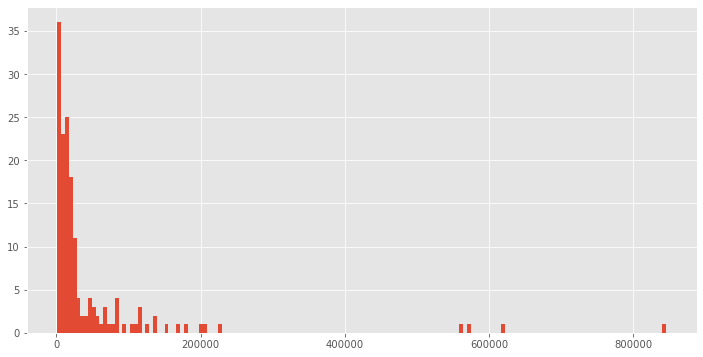

In [16]:
# histogram of registered voters by county shows largest concentration of very small counties,
# with a few very large counties.
oct_county_tots.hist(bins=159, figsize=(12,6));

In [17]:
oct_county_adds = oct_adds.groupby('county_code').count()['registration_number']
nov_county_adds = nov_adds.groupby('county_code').count()['registration_number']
dec_county_adds = dec_adds.groupby('county_code').count()['registration_number']

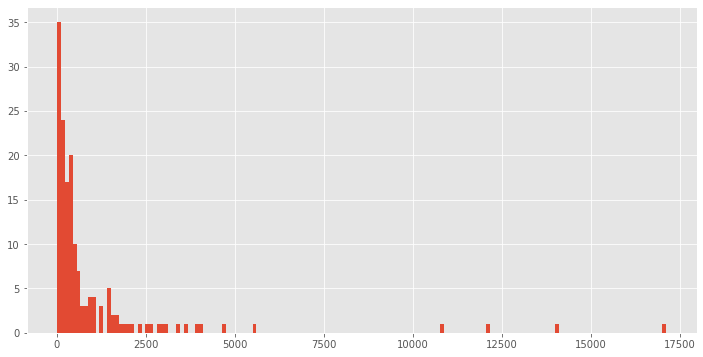

In [18]:
# Number of added registrations perfectly tracks total registrations by county
oct_county_adds.hist(bins=159, figsize=(12,6));

In [19]:
oct_county_drops = oct_drops.groupby('county_code').count()['registration_number']
nov_county_drops = nov_drops.groupby('county_code').count()['registration_number']
dec_county_drops = dec_drops.groupby('county_code').count()['registration_number']

# County-level operations (net and mean)

In [20]:
oct_county_net = oct_county_adds - oct_county_drops
nov_county_net = nov_county_adds - nov_county_drops
dec_county_net = dec_county_adds - dec_county_drops

In [21]:
oct_county_mean_adds = oct_county_adds / oct_county_tots
nov_county_mean_adds = nov_county_adds / nov_county_tots
dec_county_mean_adds = dec_county_adds / dec_county_tots

In [22]:
oct_county_mean_drops = oct_county_drops / oct_county_tots
nov_county_mean_drops = nov_county_drops / nov_county_tots
dec_county_mean_drops = dec_county_drops / dec_county_tots

In [23]:
oct_county_mean_net = oct_county_net / oct_county_tots
nov_county_mean_net = nov_county_net / nov_county_tots
dec_county_mean_net = dec_county_net / dec_county_tots

# Demographic subgroups (gender totals)

In [24]:
oct_gender_tots = oct_all.groupby('gender').count()['registration_number']
nov_gender_tots = nov_all.groupby('gender').count()['registration_number']
dec_gender_tots = dec_all.groupby('gender').count()['registration_number']
oct_gender_tots, nov_gender_tots, dec_gender_tots

(gender
 F    4056072
 M    3562251
 O      16923
 Name: registration_number, dtype: int64,
 gender
 F    4071043
 M    3577000
 O      17195
 Name: registration_number, dtype: int64,
 gender
 F    4101567
 M    3610476
 O      17795
 Name: registration_number, dtype: int64)

In [25]:
oct_gender_adds = oct_adds.groupby('gender').count()['registration_number']
nov_gender_adds = nov_adds.groupby('gender').count()['registration_number']
dec_gender_adds = dec_adds.groupby('gender').count()['registration_number']
oct_gender_adds, nov_gender_adds, dec_gender_adds

(gender
 F    78714
 M    81572
 O     1957
 Name: registration_number, dtype: int64,
 gender
 F    19714
 M    20709
 O      328
 Name: registration_number, dtype: int64,
 gender
 F    33883
 M    37032
 O      626
 Name: registration_number, dtype: int64)

In [26]:
oct_gender_drops = oct_drops.groupby('gender').count()['registration_number']
nov_gender_drops = nov_drops.groupby('gender').count()['registration_number']
dec_gender_drops = dec_drops.groupby('gender').count()['registration_number']
oct_gender_drops, nov_gender_drops, dec_gender_drops

(gender
 F    7389
 M    8857
 O      39
 Name: registration_number, dtype: int64,
 gender
 F    4763
 M    5928
 O      68
 Name: registration_number, dtype: int64,
 gender
 F    3361
 M    3543
 O      37
 Name: registration_number, dtype: int64)

# Gender-level operations (net and mean)

In [27]:
oct_gender_net = oct_gender_adds - oct_gender_drops
nov_gender_net = nov_gender_adds - nov_gender_drops
dec_gender_net = dec_gender_adds - dec_gender_drops
oct_gender_net, nov_gender_net, dec_gender_net

(gender
 F    71325
 M    72715
 O     1918
 Name: registration_number, dtype: int64,
 gender
 F    14951
 M    14781
 O      260
 Name: registration_number, dtype: int64,
 gender
 F    30522
 M    33489
 O      589
 Name: registration_number, dtype: int64)

In [28]:
oct_gender_mean_adds = oct_gender_adds / oct_gender_tots
nov_gender_mean_adds = nov_gender_adds / nov_gender_tots
dec_gender_mean_adds = dec_gender_adds / dec_gender_tots
oct_gender_mean_adds, nov_gender_mean_adds, dec_gender_mean_adds

(gender
 F    0.019406
 M    0.022899
 O    0.115641
 Name: registration_number, dtype: float64,
 gender
 F    0.004842
 M    0.005789
 O    0.019075
 Name: registration_number, dtype: float64,
 gender
 F    0.008261
 M    0.010257
 O    0.035178
 Name: registration_number, dtype: float64)

In [29]:
oct_gender_mean_drops = oct_gender_drops / oct_gender_tots
nov_gender_mean_drops = nov_gender_drops / nov_gender_tots
dec_gender_mean_drops = dec_gender_drops / dec_gender_tots
oct_gender_mean_drops, nov_gender_mean_drops, dec_gender_mean_drops

(gender
 F    0.001822
 M    0.002486
 O    0.002305
 Name: registration_number, dtype: float64,
 gender
 F    0.001170
 M    0.001657
 O    0.003955
 Name: registration_number, dtype: float64,
 gender
 F    0.000819
 M    0.000981
 O    0.002079
 Name: registration_number, dtype: float64)

In [30]:
oct_gender_mean_net = oct_gender_net / oct_gender_tots
nov_gender_mean_net = nov_gender_net / nov_gender_tots
dec_gender_mean_net = dec_gender_net / dec_gender_tots
oct_gender_mean_net, nov_gender_mean_net, dec_gender_mean_net

(gender
 F    0.017585
 M    0.020413
 O    0.113337
 Name: registration_number, dtype: float64,
 gender
 F    0.003673
 M    0.004132
 O    0.015121
 Name: registration_number, dtype: float64,
 gender
 F    0.007442
 M    0.009276
 O    0.033099
 Name: registration_number, dtype: float64)

# Partisan-level subgroups (party-level totals)

In [31]:
oct_party_tots = oct_all.groupby('party_last_voted').count()['registration_number']
nov_party_tots = nov_all.groupby('party_last_voted').count()['registration_number']
dec_party_tots = dec_all.groupby('party_last_voted').count()['registration_number']
oct_party_tots, nov_party_tots, dec_party_tots

(party_last_voted
 D     416880
 N        842
 NP     66134
 R     452252
 Name: registration_number, dtype: int64,
 party_last_voted
 D     91129
 N       723
 NP     6254
 R     71225
 Name: registration_number, dtype: int64,
 party_last_voted
 D     87649
 N       726
 NP     5970
 R     68969
 Name: registration_number, dtype: int64)

In [32]:
oct_party_adds = oct_adds.groupby('party_last_voted').count()['registration_number']
nov_party_adds = nov_adds.groupby('party_last_voted').count()['registration_number']
dec_party_adds = dec_adds.groupby('party_last_voted').count()['registration_number']
oct_party_adds, nov_party_adds, dec_party_adds

(party_last_voted
 D     784
 N      19
 NP      5
 R     428
 Name: registration_number, dtype: int64,
 party_last_voted
 D     246
 N       4
 NP      2
 R     136
 Name: registration_number, dtype: int64,
 party_last_voted
 D     421
 N       5
 NP      2
 R     218
 Name: registration_number, dtype: int64)

In [33]:
oct_party_drops = oct_drops.groupby('party_last_voted').count()['registration_number']
nov_party_drops = nov_drops.groupby('party_last_voted').count()['registration_number']
dec_party_drops = dec_drops.groupby('party_last_voted').count()['registration_number']
oct_party_drops, nov_party_drops, dec_party_drops

(party_last_voted
 D     1827
 N        4
 NP     174
 R     2044
 Name: registration_number, dtype: int64,
 party_last_voted
 D     690
 N       1
 NP     75
 R     713
 Name: registration_number, dtype: int64,
 party_last_voted
 D     221
 N       1
 NP     23
 R     289
 Name: registration_number, dtype: int64)

# Party-level operations (net and mean)

In [34]:
oct_party_net = oct_party_adds - oct_party_drops
nov_party_net = nov_party_adds - nov_party_drops
dec_party_net = dec_party_adds - dec_party_drops
oct_party_net, nov_party_net, dec_party_net

(party_last_voted
 D    -1043
 N       15
 NP    -169
 R    -1616
 Name: registration_number, dtype: int64,
 party_last_voted
 D    -444
 N       3
 NP    -73
 R    -577
 Name: registration_number, dtype: int64,
 party_last_voted
 D     200
 N       4
 NP    -21
 R     -71
 Name: registration_number, dtype: int64)

In [35]:
oct_party_mean_adds = oct_party_adds / oct_party_tots
nov_party_mean_adds = nov_party_adds / nov_party_tots
dec_party_mean_adds = dec_party_adds / dec_party_tots

oct_party_mean_adds, nov_party_mean_adds, dec_party_mean_adds

(party_last_voted
 D     0.001881
 N     0.022565
 NP    0.000076
 R     0.000946
 Name: registration_number, dtype: float64,
 party_last_voted
 D     0.002699
 N     0.005533
 NP    0.000320
 R     0.001909
 Name: registration_number, dtype: float64,
 party_last_voted
 D     0.004803
 N     0.006887
 NP    0.000335
 R     0.003161
 Name: registration_number, dtype: float64)

In [36]:
oct_party_mean_drops = oct_party_drops / oct_party_tots
nov_party_mean_drops = nov_party_drops / nov_party_tots
dec_party_mean_drops = dec_party_drops / dec_party_tots
oct_party_mean_drops, nov_party_mean_drops, dec_party_mean_drops

(party_last_voted
 D     0.004383
 N     0.004751
 NP    0.002631
 R     0.004520
 Name: registration_number, dtype: float64,
 party_last_voted
 D     0.007572
 N     0.001383
 NP    0.011992
 R     0.010011
 Name: registration_number, dtype: float64,
 party_last_voted
 D     0.002521
 N     0.001377
 NP    0.003853
 R     0.004190
 Name: registration_number, dtype: float64)

In [37]:
oct_party_mean_net = oct_party_net / oct_party_tots
nov_party_mean_net = nov_party_net / nov_party_tots
dec_party_mean_net = dec_party_net / dec_party_tots
oct_party_mean_net, nov_party_mean_net, dec_party_mean_net

(party_last_voted
 D    -0.002502
 N     0.017815
 NP   -0.002555
 R    -0.003573
 Name: registration_number, dtype: float64,
 party_last_voted
 D    -0.004872
 N     0.004149
 NP   -0.011673
 R    -0.008101
 Name: registration_number, dtype: float64,
 party_last_voted
 D     0.002282
 N     0.005510
 NP   -0.003518
 R    -0.001029
 Name: registration_number, dtype: float64)

# Statistical Tests

In [38]:
'''
Modeling the state rate of added voters using binomial distribution because the subset of
added voters compared to the population of all voters is essentially a bernoulli trial
(0=not added, 1=added) repeated for a number of trials equal to registered voters. Crudely,
n = # of registered voters, p = # of added voters / n.
'''

state_binomial = stats.binom(n=oct_state_tot, p=oct_mean_adds_state)

In [39]:
'''
I would like to apply the statewide rate of added registrations to individual county rates of
added registrations, but the calculation p = # of added voters / n yields a value that
exaggerates the mean in favor of more populace counties. I corrected for this by compiling
the mean value of county-wide mean values (sum(county mean values) / # counties) and comparing
this county-level mean to the mean values of individual counties.
In the interests of narrowed scope, let's compare the county-level mean value to counties
with the highest rates of added registrations:
'''

ot5 = oct_county_mean_adds.sort_values(ascending=False)
nt5 = nov_county_mean_adds.sort_values(ascending=False)
dt5 = dec_county_mean_adds.sort_values(ascending=False)

oct_county_mean_adds.mean(), ot5.head(), nov_county_mean_adds.mean(), nt5.head(), dec_county_mean_adds.mean(), dt5.head()

(0.02073116526145582,
 county_code
 91     0.048399
 127    0.038796
 57     0.036528
 89     0.036430
 21     0.035231
 Name: registration_number, dtype: float64,
 0.007025996396272748,
 county_code
 26     0.025876
 54     0.017694
 43     0.015810
 27     0.015244
 146    0.015144
 Name: registration_number, dtype: float64,
 0.009102411286477404,
 county_code
 9      0.020577
 149    0.018626
 115    0.017457
 129    0.017258
 138    0.017081
 Name: registration_number, dtype: float64)

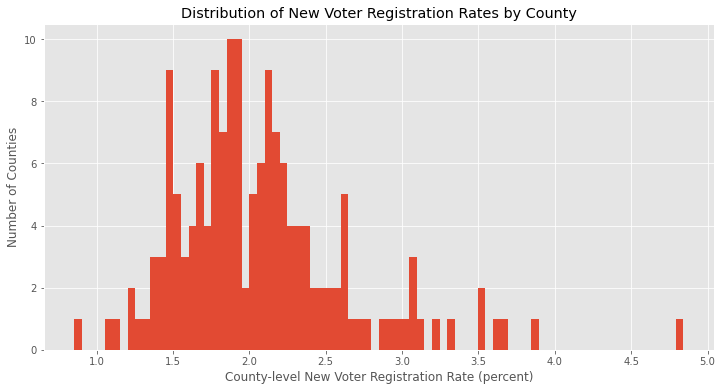

In [40]:
#ot5.hist(bins=80, figsize=(12,3));
plt.figure(figsize=(12,6))
x = ot5

plt.title("Distribution of New Voter Registration Rates by County")
plt.xlabel("County-level New Voter Registration Rate (percent)")
plt.ylabel("Number of Counties")

plt.hist(x * 100, bins=80)
plt.show() 

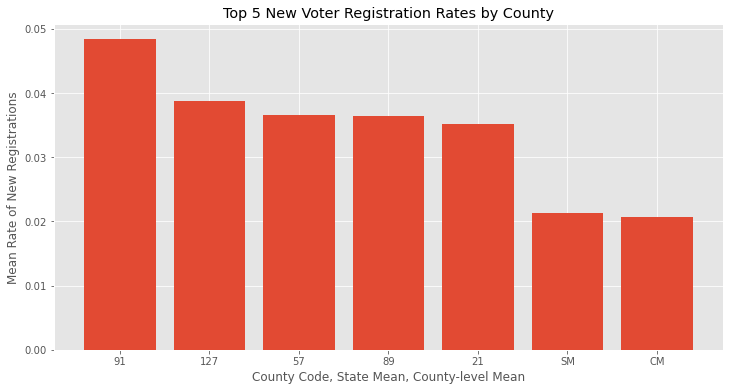

In [41]:
plt.figure(figsize=(12,6))
x = np.array(["91", "127", "57", "89", "21", "SM", "CM"])
y = np.array([0.048399, 0.038796, 0.036528, 0.036430, 0.035231, 0.02124921711756242, 0.02073116526145582])

plt.title("Top 5 New Voter Registration Rates by County")
plt.xlabel("County Code, State Mean, County-level Mean")
plt.ylabel("Mean Rate of New Registrations")

plt.bar(x,y)
plt.show()

In [42]:
'''
October stands out as both the month with the highest rates of added registrations and a month
in which the most active counties register voters at more than twice the rate of the mean 
[vertical bar chart for top counties]. It would be comforting to know that this rate of voter 
registration in high performing counties fits within the distribution established by the
county-level mean calculated previously.
Using a binomial distribution with n = # of registered voters in county, p = county-level
mean, we can calculate the likelihood(?) that we would observe the number of added
registrations in a particular county by taking the CDF of the number of added registrations.
'''
# registrations by county
county91_tot_regs = oct_all[oct_all['county_code'] == 91]
county127_tot_regs = oct_all[oct_all['county_code'] == 127]
county57_tot_regs = oct_all[oct_all['county_code'] == 57]
county89_tot_regs = oct_all[oct_all['county_code'] == 89]
county21_tot_regs = oct_all[oct_all['county_code'] == 21]

# new registrations by county
county91_regs = oct_adds[oct_adds['county_code'] == 91]
county127_regs = oct_adds[oct_adds['county_code'] == 127]
county57_regs = oct_adds[oct_adds['county_code'] == 57]
county89_regs = oct_adds[oct_adds['county_code'] == 89]
county21_regs = oct_adds[oct_adds['county_code'] == 21]

# total registered voters by county
county91_oct_tot = county91_tot_regs['registration_number'].count()
county127_oct_tot = county127_tot_regs['registration_number'].count()
county57_oct_tot = county57_tot_regs['registration_number'].count()
county89_oct_tot = county89_tot_regs['registration_number'].count()
county21_oct_tot = county21_tot_regs['registration_number'].count()

# newly registered voters by county
county91_oct_adds = county91_regs['registration_number'].count()
county127_oct_adds = county127_regs['registration_number'].count()
county57_oct_adds = county57_regs['registration_number'].count()
county89_oct_adds = county89_regs['registration_number'].count()
county21_oct_adds = county21_regs['registration_number'].count()

In [43]:
# the top performing counties are relatively small, with one possible exception
county91_oct_tot, county127_oct_tot, county57_oct_tot, county89_oct_tot, county21_oct_tot

(10496, 19203, 62335, 41559, 6727)

In [44]:
# they also have relatively few added voters
county91_oct_adds, county127_oct_adds, county57_oct_adds, county89_oct_adds, county21_oct_adds

(508, 745, 2277, 1514, 237)

In [45]:
# making county-level binomial distributions
county91_binomial = stats.binom(n=county91_oct_tot, p=oct_county_mean_adds.mean())
county127_binomial = stats.binom(n=county127_oct_tot, p=oct_county_mean_adds.mean())
county57_binomial = stats.binom(n=county57_oct_tot, p=oct_county_mean_adds.mean())
county89_binomial = stats.binom(n=county89_oct_tot, p=oct_county_mean_adds.mean())
county21_binomial = stats.binom(n=county21_oct_tot, p=oct_county_mean_adds.mean())

In [46]:
# calculating county-specific p-values
county91_cdf = 1 - county91_binomial.cdf(county91_oct_adds)
county127_cdf = 1 - county127_binomial.cdf(county127_oct_adds)
county57_cdf = 1 - county57_binomial.cdf(county57_oct_adds)
county89_cdf = 1 - county89_binomial.cdf(county89_oct_adds)
county21_cdf = 1 - county21_binomial.cdf(county21_oct_adds)

In [47]:
# we see nothing below a 0.05 rejection threshhold to warrant rejecting the null hypothesis
county91_cdf, county127_cdf, county57_cdf, county89_cdf, county21_cdf

(1.1102230246251565e-16,
 1.1102230246251565e-16,
 1.1102230246251565e-16,
 1.1102230246251565e-16,
 1.0325074129013956e-14)

In [48]:
'''
At least at the level of counties with the highest rates of voter registration, there is no
apparent concern that the individual registration rates fall outside the range we would expect
from the mean registration rate for counties taken as a whole.

What if we turn instead to demographic questions and ask whether registration rates for
either gender falls outside the range we might expect if we took our mean from the state as a
whole?

Because the records only categorize gender three ways (F, M, O), it may not be as valueable
to take a mean of the means within each gender category. The noticably higher value for the
mean of gender means likely results from the much higher rate of registration among the
(O)ther category. For the sake of comparison and given these caveats, we will compare our 
hypothesis test results using both values.
'''

oct_gender_mean_adds.mean(), oct_mean_adds_state

(0.05264896633425916, 0.02124921711756242)

In [49]:
# registrations by gender 
f_tot_regs = oct_all[oct_all['gender'] == 'F']
m_tot_regs = oct_all[oct_all['gender'] == 'M']
o_tot_regs = oct_all[oct_all['gender'] == 'O']

# new registrations by gender
f_regs = oct_adds[oct_adds['gender'] == 'F']
m_regs = oct_adds[oct_adds['gender'] == 'M']
o_regs = oct_adds[oct_adds['gender'] == 'O']

# total registered voters by gender
f_oct_tot = f_tot_regs['registration_number'].count()
m_oct_tot = m_tot_regs['registration_number'].count()
o_oct_tot = o_tot_regs['registration_number'].count()

# newly registered voters by gender
f_oct_adds = f_regs['registration_number'].count()
m_oct_adds = m_regs['registration_number'].count()
o_oct_adds = o_regs['registration_number'].count()

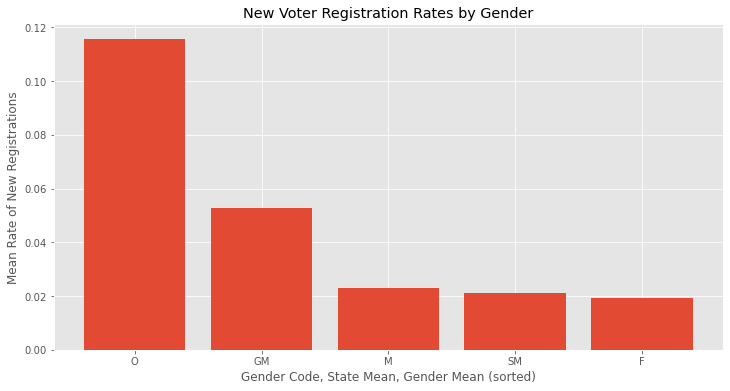

In [50]:
plt.figure(figsize=(12,6))
x = np.array(["O","GM", "M", "SM", "F"])
y = np.array([oct_gender_mean_adds[2], oct_gender_mean_adds.mean(), oct_gender_mean_adds[1], oct_mean_adds_state, oct_gender_mean_adds[0]])

plt.title("New Voter Registration Rates by Gender")
plt.xlabel("Gender Code, State Mean, Gender Mean (sorted)")
plt.ylabel("Mean Rate of New Registrations")

plt.bar(x,y)
plt.show()

In [51]:
# binomials based on gender mean
fgm_binomial = stats.binom(n=f_oct_tot, p=oct_gender_mean_adds.mean())
mgm_binomial = stats.binom(n=m_oct_tot, p=oct_gender_mean_adds.mean())
ogm_binomial = stats.binom(n=o_oct_tot, p=oct_gender_mean_adds.mean())

In [52]:
# binomials based on state mean
fsm_binomial = stats.binom(n=f_oct_tot, p=oct_mean_adds_state)
msm_binomial = stats.binom(n=m_oct_tot, p=oct_mean_adds_state)
osm_binomial = stats.binom(n=o_oct_tot, p=oct_mean_adds_state)

In [53]:
# calculating p-values based on gender mean
fgm_cdf = 1 - fgm_binomial.cdf(f_oct_adds)
mgm_cdf = 1 - mgm_binomial.cdf(m_oct_adds)
ogm_cdf = 1 - ogm_binomial.cdf(o_oct_adds)

# calculating p-values based on state mean
fsm_cdf = 1 - fsm_binomial.cdf(f_oct_adds)
msm_cdf = 1 - msm_binomial.cdf(m_oct_adds)
osm_cdf = 1 - osm_binomial.cdf(o_oct_adds)

In [54]:
# we see nothing below a 0.05 rejection threshhold to warrant rejecting the null hypothesis
# using the gender mean.
fgm_cdf, mgm_cdf, ogm_cdf

(1.0, 1.0, 1.1102230246251565e-16)

In [55]:
# we see nothing below a 0.05 rejection threshhold to warrant rejecting the null hypothesis
# using the state mean.
fsm_cdf, msm_cdf, osm_cdf

(1.0, 1.1102230246251565e-16, 1.1102230246251565e-16)

In [56]:
'''
Finally, although we haven't discovered any reason to reject the null hypotheses with respect
to geography (county-level) or demographics (gender), given the claims of partisan vote
tampering leveled at Georgia state officials, it remains to ask whether party affiliation
could be used to predict irregular rates of voter registration in the run-up to the election.

Georgia voter registration records collect data on the party a voter last voted for, but, as
might plainly be expected, new voters generally will not have a last party voted on their
registrations. Accordingly, to meaningfully examine irregular voter registration patterns with
respect to party affiliation, I will examine the patterns of dropped voter registrations for
irregularities along partisan lines.

As a further caveat, the rates of dropped registrations generally (at the state level) are
much lower than the rates of new voter registration. The same pattern is evident at the
partisan level. One expects this can only contribute to variability in the rates of dropped
registrations at this level. Added to that, Georgia only designates four party affiliations 
(D, N, NP, R), so, as with gender, there is less reason to prefer a mean of party rate of 
dropped registrations over the mean for the state at large. Again, for purposes of comparison,
both values will be considered.
'''
oct_party_mean_drops.mean(), oct_mean_drops_state

(0.004070943983676998, 0.0021328716848153942)

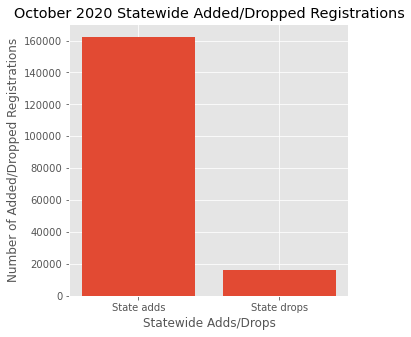

In [57]:
plt.figure(figsize=(5,5))
x = np.array(["State adds", "State drops"])
y = np.array([oct_state_adds, oct_state_drops])

plt.title("October 2020 Statewide Added/Dropped Registrations")
plt.xlabel("Statewide Adds/Drops")
plt.ylabel("Number of Added/Dropped Registrations")

plt.bar(x,y)
plt.show()

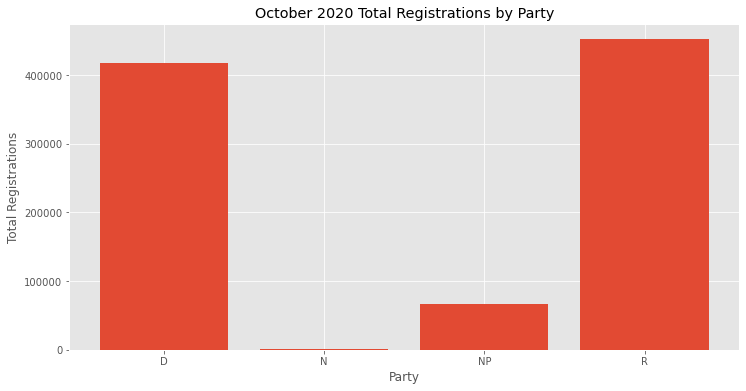

In [58]:
plt.figure(figsize=(12,6))
x = np.array(["D", "N", "NP", "R"])
y = np.array([oct_party_tots[0],  oct_party_tots[1], oct_party_tots[2], oct_party_tots[3]])

plt.title("October 2020 Total Registrations by Party")
plt.xlabel("Party")
plt.ylabel("Total Registrations")

plt.bar(x,y)
plt.show()

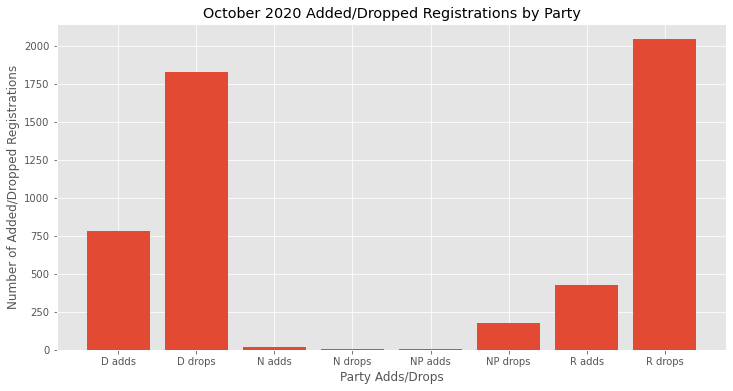

In [59]:
plt.figure(figsize=(12,6))
x = np.array(["D adds", "D drops", "N adds", "N drops", "NP adds", "NP drops", "R adds", "R drops"])
y = np.array([oct_party_adds[0], oct_party_drops[0],oct_party_adds[1], oct_party_drops[1],oct_party_adds[2], oct_party_drops[2],oct_party_adds[3], oct_party_drops[3]])

plt.title("October 2020 Added/Dropped Registrations by Party")
plt.xlabel("Party Adds/Drops")
plt.ylabel("Number of Added/Dropped Registrations")

plt.bar(x,y)
plt.show()

In [60]:
# registrations by party (D, N, NP, R)
d_tot_regs = oct_all[oct_all['party_last_voted'] == 'D']
n_tot_regs = oct_all[oct_all['party_last_voted'] == 'N']
np_tot_regs = oct_all[oct_all['party_last_voted'] == 'NP']
r_tot_regs = oct_all[oct_all['party_last_voted'] == 'R']

# new registrations by party
d_regs = oct_adds[oct_adds['party_last_voted'] == 'D']
n_regs = oct_adds[oct_adds['party_last_voted'] == 'N']
np_regs = oct_adds[oct_adds['party_last_voted'] == 'NP']
r_regs = oct_adds[oct_adds['party_last_voted'] == 'R']

# total registered voters by party
d_oct_tot = d_tot_regs['registration_number'].count()
n_oct_tot = n_tot_regs['registration_number'].count()
np_oct_tot = np_tot_regs['registration_number'].count()
r_oct_tot = r_tot_regs['registration_number'].count()

# newly registered voters by party
d_oct_drops = d_regs['registration_number'].count()
n_oct_drops = n_regs['registration_number'].count()
np_oct_drops = np_regs['registration_number'].count()
r_oct_drops = r_regs['registration_number'].count()

In [61]:
# binomials based on party mean
dpm_binomial = stats.binom(n=d_oct_tot, p=oct_party_mean_drops.mean())
npm_binomial = stats.binom(n=n_oct_tot, p=oct_party_mean_drops.mean())
nppm_binomial = stats.binom(n=np_oct_tot, p=oct_party_mean_drops.mean())
rpm_binomial = stats.binom(n=r_oct_tot, p=oct_party_mean_drops.mean())

In [62]:
# binomials based on state mean
dsm_binomial = stats.binom(n=d_oct_tot, p=oct_mean_drops_state)
nsm_binomial = stats.binom(n=n_oct_tot, p=oct_mean_drops_state)
npsm_binomial = stats.binom(n=np_oct_tot, p=oct_mean_drops_state)
rsm_binomial = stats.binom(n=r_oct_tot, p=oct_mean_drops_state)

In [63]:
# calculating p-values based on party mean
dpm_cdf = 1 - dpm_binomial.cdf(d_oct_drops)
npm_cdf = 1 - npm_binomial.cdf(n_oct_drops)
nppm_cdf = 1 - nppm_binomial.cdf(np_oct_drops)
rpm_cdf = 1 - rpm_binomial.cdf(r_oct_drops)

# calculating p-values based on state mean
dsm_cdf = 1 - dsm_binomial.cdf(d_oct_drops)
nsm_cdf = 1 - nsm_binomial.cdf(n_oct_drops)
npsm_cdf = 1 - npsm_binomial.cdf(np_oct_drops)
rsm_cdf = 1 - rsm_binomial.cdf(r_oct_drops)

In [64]:
# we see nothing below a 0.05 rejection threshhold to warrant rejecting the null hypothesis
# using the party mean.
dpm_cdf, npm_cdf, nppm_cdf, rpm_cdf

(1.0, 6.823602793915029e-10, 1.0, 1.0)

In [65]:
# we see nothing below a 0.05 rejection threshhold to warrant rejecting the null hypothesis
# using the state mean.
dsm_cdf, nsm_cdf, npsm_cdf, rsm_cdf

(0.9998282327665493, 7.549516567451064e-15, 1.0, 1.0)